#### Question 1

This credit facility dataset to be analyzed comprises records of customers’ demographics, amount owed, repayment history/status etc. The data dictionary of this dataset is depicted in Appendix 1.

List the categorical and numeric variables in this dataset.

#### Categorical variables:
"ID", "GENDER", "EDUCATION", "MARITAL", "S(n)", "RATING"

#### Numeric Variables:
"LIMIT", "BALANCE", "INCOME", "AGE", "B(n)", "R(n)"

#### Question 2

Conduct four (4) data pre-processing tasks for the analysis of the data, explaining results obtained.

In [1]:
import pandas as pd
import numpy as np

#read csv file
df = pd.read_csv("ECA_data.csv")
df.isnull().sum() # check for missing data

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [2]:
df.shape #check number of rows in data

(18769, 24)

In [3]:
#replace '-1' and '199' in column 'AGE' with NaN, -1 and 199 is impossible value in csv data
df['AGE'] = df['AGE'].replace([-1,199],None)
#drop all rows with missing value
df = df.dropna(axis = 0, how = 'any')
df.shape #check number of rows drop = 59 rows

(18710, 24)

The data set have 38 missing values under 'MARITAL', 13 missing values under 'EDUCATION' and 10 impossible value(-1, 199) under 'AGE'. Solution is to drop rows with missing and impossible data.

In [4]:
#check for duplicated data
df.loc[df.duplicated(keep = 'first'),:]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
132,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
379,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
422,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


In [5]:
#drop rows with duplicated data
df.drop_duplicates(inplace = True)
df.shape #check if rows are dropped

(18707, 24)

There are 3 duplicated rows in the data set. Solution is to drop them.

In [6]:
#check data set for formating issue.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18707 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18707 non-null  int64  
 1   LIMIT      18707 non-null  int64  
 2   BALANCE    18707 non-null  float64
 3   INCOME     18707 non-null  int64  
 4   RATING     18707 non-null  int64  
 5   GENDER     18707 non-null  int64  
 6   EDUCATION  18707 non-null  float64
 7   MARITAL    18707 non-null  float64
 8   AGE        18707 non-null  object 
 9   S1         18707 non-null  int64  
 10  S2         18707 non-null  int64  
 11  S3         18707 non-null  int64  
 12  S4         18707 non-null  int64  
 13  S5         18707 non-null  int64  
 14  B1         18707 non-null  int64  
 15  B2         18707 non-null  int64  
 16  B3         18707 non-null  int64  
 17  B4         18707 non-null  int64  
 18  B5         18707 non-null  int64  
 19  R1         18707 non-null  int64  
 20  R2    

In [7]:
#strip '$' from column 'R3' data
df['R3'] = df['R3'].map(lambda x: x.lstrip('$'))
#strip comma from column 'R3' data
df['R3'] = df['R3'].str.replace((','),'')
#convert column R3 to int64
df['R3'] = pd.to_numeric(df['R3'])
df.dtypes #show dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE           object
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int64
R4             int64
R5             int64
dtype: object

There are non integer values in column 'R3' which might affect tabulation later. Solution is to remove the '$' and ',' from 'R3' data.

#### Question 3

Articulate five (5) relevant insights of the data, with supporting visualization for each insight.

In [8]:
import matplotlib as plt

output = pd.pivot_table(data=df, 
                        index=['GENDER'],
                        values=['INCOME'],
                        aggfunc='mean')
output

,INCOME
GENDER,
0,173531.208707
1,180513.281674


<AxesSubplot:title={'center':'Average Income by Gender'}, xlabel='GENDER'>

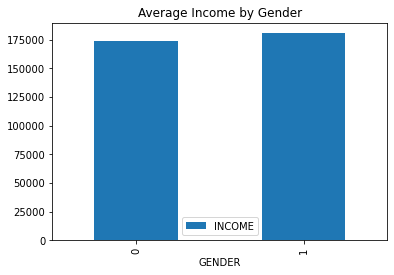

In [9]:
output.plot(kind="bar", title = "Average Income by Gender")

0 = Male, 1 = Female. The average income per annum for Male and Female is approximately the same, between $170K - $180K.

In [10]:
output1 = pd.pivot_table(data=df, 
                        index=['EDUCATION'],
                        values=['INCOME'],
                        aggfunc='mean')
output1

,INCOME
EDUCATION,
0.0,194596.077844
1.0,228297.668280
2.0,156432.736207
3.0,133161.773415


<AxesSubplot:title={'center':'Average Income by Education'}, xlabel='EDUCATION'>

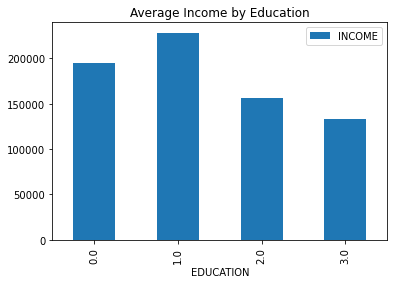

In [11]:
output1.plot(kind="bar", title = "Average Income by Education")

0 = Others, 1 = Postgraduate, 2 = Tertiary, 3 = High School. Average income per annum is the highest amoung postgraduate, second is others, third is tertiary graduates and the lowest is high school graduates.

In [12]:
output2 = pd.pivot_table(data=df, 
                        index=['MARITAL'],
                        values=['INCOME'],
                        aggfunc='mean')
output2

,INCOME
MARITAL,
0.0,103786.984127
1.0,192365.616808
2.0,166412.439511


<AxesSubplot:title={'center':'Average Income by Marital Status'}, xlabel='MARITAL'>

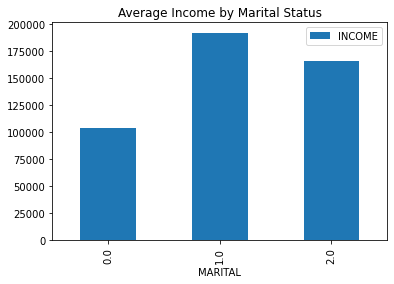

In [13]:
output2.plot(kind="bar", title = "Average Income by Marital Status")

0 = Others, 1 = Single, 2 = Married. Average income earned is the highest by singles followed by married people and the lowest is amoung other marital status.

#### Question 4
Perform linear regression modelling to predict the variable, B1, explaining the approach taken, including any further data pre-processing.

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [15]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)
df['BALANCE'] = df['BALANCE'].astype(int)
LR = linear_model.LinearRegression()
LR.fit(df[['BALANCE']],df.B1)

LinearRegression()

In [16]:
LR.predict(1000)

C:\Users\mkumar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=1000.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.